# Book Sales - Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Books_Data_Clean.csv')

## Data Overview

In [3]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [7]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


### Observations:
- Th publishing year  colum has 1069  non-null values, fewer than the tota 1070 records..
- This suggests missing data that will need to be handled before modeling.

In [9]:
df=df[df['Publishing Year']>1900];

In [11]:
df.isna().sum()

index                   0
Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

#### Book name column has 49 Null values and language_code column has 21 Null Entries.

In [13]:
df.dropna(subset='Book Name', inplace= True)

In [15]:
df.isna().sum()

index                   0
Publishing Year         0
Book Name               0
Author                  0
language_code          47
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

#### Here, we have removed rows where book name was null 

In [21]:
df.duplicated().sum()

0

In [23]:
df.nunique()

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

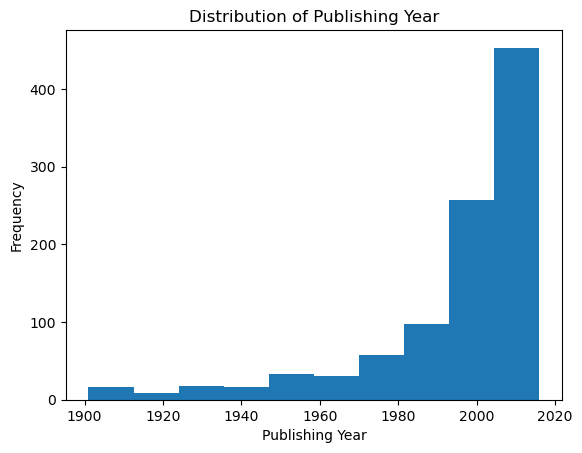

<Figure size 640x480 with 0 Axes>

In [200]:
plt.hist(df["Publishing Year"])
plt.xlabel('Publishing Year')
plt.ylabel('Frequency')
plt.title("Distribution of Publishing Year")
plt.show()

### Observations:
- Most books were published between 2000 and 2020.
- There is a peak in publications around 2010.
- Older books (before 1980) appear less frequently in the dataset.

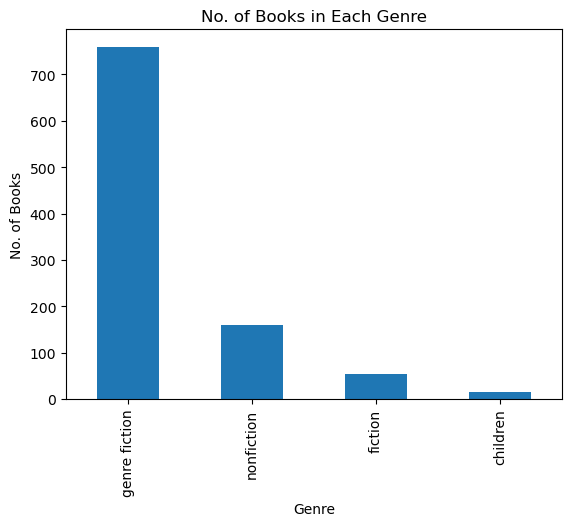

In [224]:
df["genre"].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('No. of Books')
plt.title('No. of Books in Each Genre')
plt.show()

### Observations:
- Highest no. of books sold from fiction genre.
- Lowest no. of books are sold from children books.


In [65]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

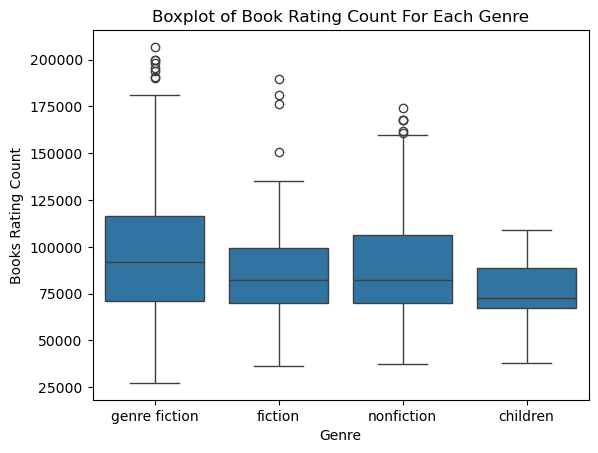

In [237]:
sns.boxplot(x='genre',y='Book_ratings_count',data=df)
plt.xlabel('Genre')
plt.ylabel('Books Rating Count')
plt.title("Boxplot of Book Rating Count For Each Genre")
plt.show()

### Observations

- Genre fiction has the highest median rating count and more high-rating outliers.
- Fiction and nonfiction have similar median counts, with some high outliers.
- Children books have the lowest median rating count and fewer outliers.
- All genres show variability, with some books being much more popular than others.


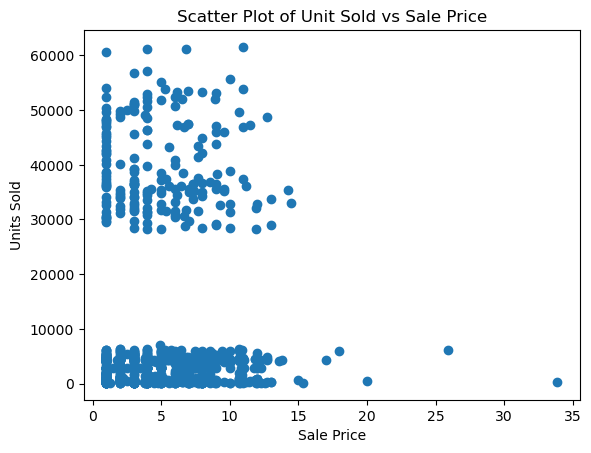

In [242]:
plt.scatter(df["sale price"],df["units sold"])
plt.xlabel("Sale Price")
plt.ylabel("Units Sold")
plt.title('Scatter Plot of Unit Sold vs Sale Price')
plt.show()

### Observations

- Most units are sold at lower sale prices (below $15).
- There is no clear linear relationship between sale price and units sold.
- Higher unit sales are mostly seen at lower prices.


In [107]:
language_counts=df["language_code"].value_counts()
language_counts

language_code
eng      670
en-US    226
en-GB     29
en-CA      7
fre        4
spa        2
ara        2
nl         1
Name: count, dtype: int64

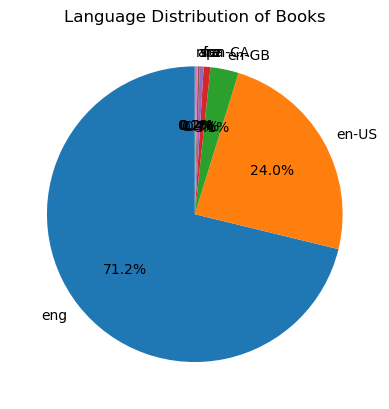

<Figure size 640x480 with 0 Axes>

In [208]:
plt.pie(language_counts,labels=language_counts.index,startangle=90,autopct="%1.1f%%")
plt.title('Language Distribution of Books')
plt.show()


### Observations

- 71.2% of books are sold were in English language.
- 24% of books are in US English.
- 5% of booka are from other language


In [141]:
df.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending=False)

Publisher 
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                121769.814
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

#### Revenue generated by publisher in decending order

In [151]:
df.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending=False).max()

101400.27256944444

In [155]:
df.groupby('language_code').size()

language_code
ara        2
en-CA      7
en-GB     29
en-US    226
eng      670
fre        4
nl         1
spa        2
dtype: int64

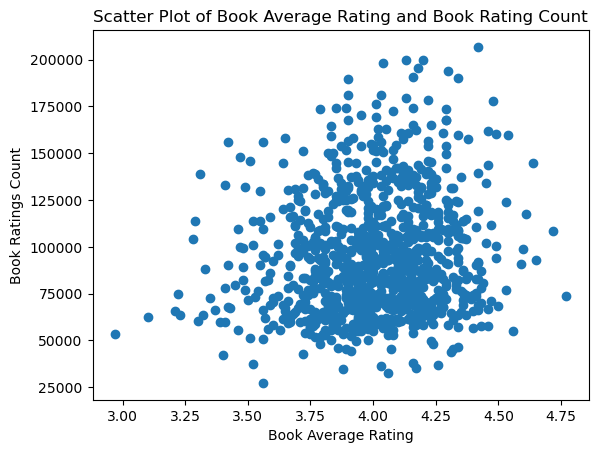

In [249]:
plt.scatter(df["Book_average_rating"], df["Book_ratings_count"])
plt.xlabel("Book Average Rating")
plt.ylabel("Book Ratings Count")
plt.title("Scatter Plot of Book Average Rating and Book Rating Count")


Most books cluster between average ratings 3.5 and 4.5 — so most books have decent to good ratings.

In [159]:
total_gross_sales_by_author= df.groupby("Author")["gross sales"].sum()

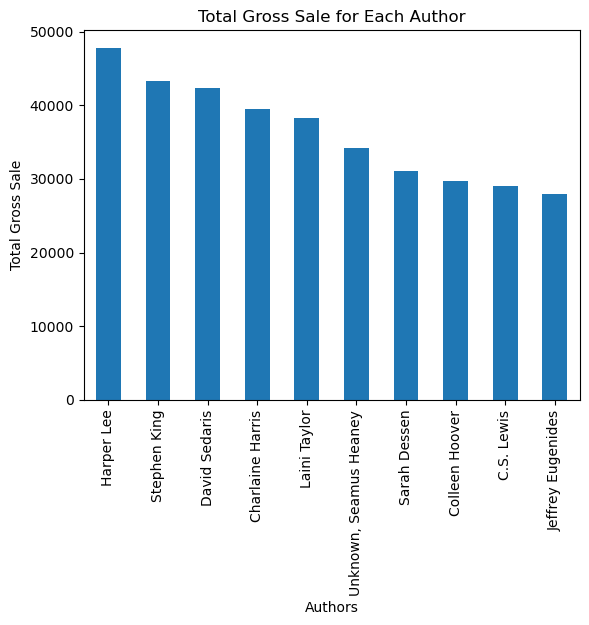

<Figure size 640x480 with 0 Axes>

In [212]:
total_gross_sales_by_author.sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel("Authors")
plt.ylabel("Total Gross Sale")
plt.title("Total Gross Sale for Each Author")
plt.show()


#### The Author Harper Lee's books achieved the highest sales.

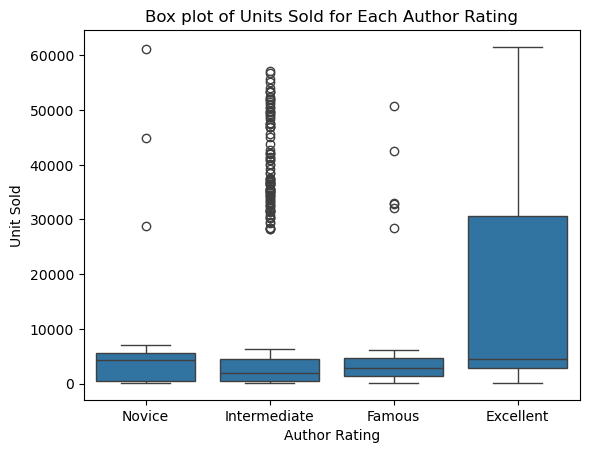

In [255]:
sns.boxplot(x="Author_Rating",y="units sold", data=df)
plt.xlabel("Author Rating")
plt.ylabel("Unit Sold")
plt.title("Box plot of Units Sold for Each Author Rating")
plt.show()

#### Observation
- Excellent-rated authors have significantly higher median and more variable unit sales compared to other groups. 
- Novice, Intermediate, and Famous authors show similar sales distributions, with a few high-selling outliers.



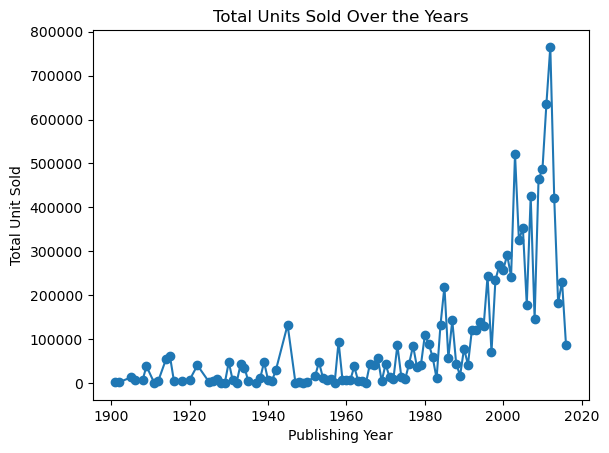

In [220]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind='line',marker="o")
plt.xlabel("Publishing Year")
plt.ylabel("Total Unit Sold")
plt.title("Total Units Sold Over the Years")
plt.show()

### Observations

- Books sales is increased after 1980 but declined after 2010.

